# APO Lab 6 Analiza obrazu

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

!WAŻNE! Aby poniższy plik działał na Google Colab, należy wgrać plik '3shapes.bmp' do Zad1 oraz pliki 'svm_utils.py', 'train_ryz.jpg', 'train_fasola.jpg', 'train_soczewica.jpg', 'test1.jpg' do Zad2. Z panelu po lewej stronie wybieramy ikonę folderu ('Files') a następnie 'Upload' i wybieramy plik (wcześniej ściągnięte na dysk twardy z UBI).

# Zadanie 1

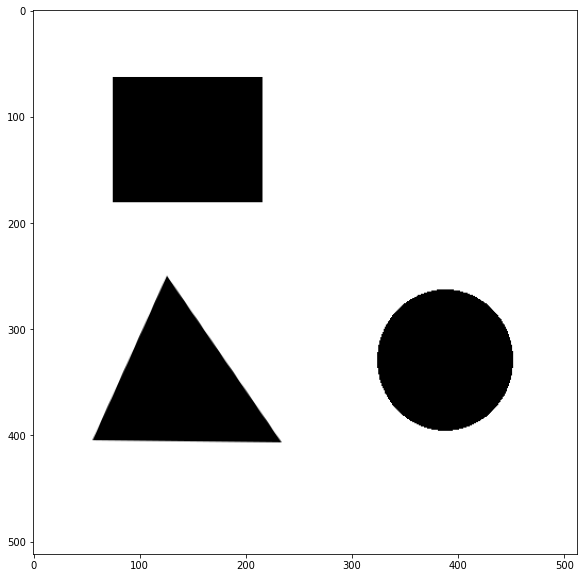

In [2]:
# Wczytanie obrazu pierwotnego
img = cv2.imread('3shapes.bmp', cv2.IMREAD_GRAYSCALE)
#cv2_imshow(img)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

Funkcja cv2.findContours pozwala w prosty sposób wybrać z obrazu binarnego obiekty a właściwie ich kontury/obrysy. Jej ierwszym argumentem wejściowym jest oczywiście obraz. Dwa kolejne parametry definiują szczegóły generowania konturów. Drugi parametr określa czy znalezione zostaną wyłącznie kontóry zewnętrzne czy wszystie i określa hierarchiczność. W tym przykładzie będziemy korzystać z opcji *cv2.RETR_LIST*, która generuje wszystkie kontóry w obrazie bez ustalania ich hierarchii. Trzeci paramer określa czy i w jaki sposób kontury obiektów będą przybliżane (aproksymowane) aby zminimalizować liczbę punktów niezbędnych do przechowania. W tym przykładzie będziemy korzystać z opcji *cv2.CHAIN_APPROX_SIMPLE*, która enkoduje linie poziome, pionowe i nachylone pod kątem 45 stopni.

Pozostałe opcje drugiego parametru:


*   RETR_EXTERNAL 
Python: cv.RETR_EXTERNAL
retrieves only the extreme outer contours. It sets hierarchy[i][2]=hierarchy[i][3]=-1 for all the contours.

*   RETR_LIST 
Python: cv.RETR_LIST
retrieves all of the contours without establishing any hierarchical relationships.

*   RETR_CCOMP 
Python: cv.RETR_CCOMP
retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.

*   RETR_TREE 
Python: cv.RETR_TREE
retrieves all of the contours and reconstructs a full hierarchy of nested contours.

*   RETR_FLOODFILL 
Python: cv.RETR_FLOODFILL

Pozostałe opcje trzeciego parametru:

*   CHAIN_APPROX_NONE 
Python: cv.CHAIN_APPROX_NONE
stores absolutely all the contour points. That is, any 2 subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neighbors, that is, max(abs(x1-x2),abs(y2-y1))==1.

*   CHAIN_APPROX_SIMPLE 
Python: cv.CHAIN_APPROX_SIMPLE
compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.

*   CHAIN_APPROX_TC89_L1 
Python: cv.CHAIN_APPROX_TC89_L1
applies one of the flavors of the Teh-Chin chain approximation algorithm

*   CHAIN_APPROX_TC89_KCOS 
Python: cv.CHAIN_APPROX_TC89_KCOS
applies one of the flavors of the Teh-Chin chain approximation algorithm


[Referencja] Dokumentacja: https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#findcontours

In [3]:
# preporcessing
ret,thresh = cv2.threshold(img,127,255,0) # pogowanie obrazu pierwotnego aby uzyskac obraz binarny
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) # funkcja znajdywania kontórow w obrazie binarnym
len(contours) # liczb znalezionych konturów

4

Jak łatwo zauważyć pomimo że na obrazie są trzy obiekty to algorytm znalazł 4 kontury. Zobaczmy dlaczego. Narysyjemy wszystkie znalezione kontury na obrazie.

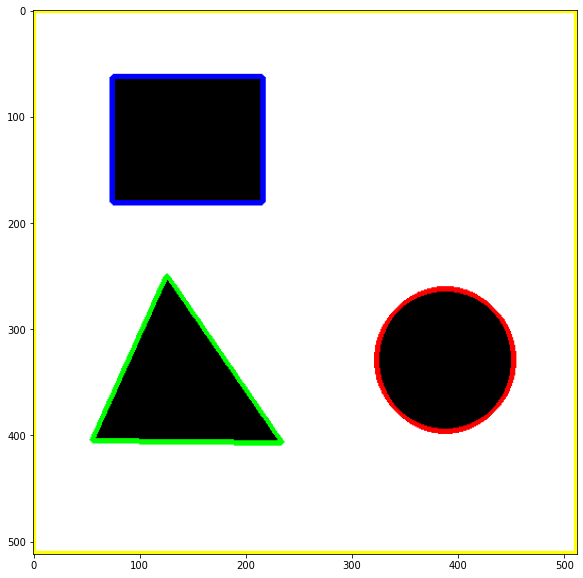

In [4]:
# Rysowanie kontórów na obrazie

img2 = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB) # konwersja z szaroodcieniowego do RGB (właściwie to kolejność BGR) aby można było rysować kolorowe kontury

# rysujemy pierwszy kontur kolorem niebieskim
cnt = contours[0]
cv2.drawContours(img2, [cnt], 0, (255,0,0), 3)

# rysujemy drugi kontur kolorem zielonym
cnt = contours[1]
cv2.drawContours(img2, [cnt], 0, (0,255,0), 3)

# rysujemy trzeci kontur kolorem czerwonym
cnt = contours[2]
cv2.drawContours(img2, [cnt], 0, (0,0,255), 3)

# rysujemy czwarty kontur innym kolorem
cnt = contours[3]
cv2.drawContours(img2, [cnt], 0, (255,255,0), 3)

#cv2_imshow(img2)
plt.figure(figsize=(10,10))
plt.imshow(img2)

Jak widać algorytm znajduje również kontur najbardziej zewnętrzny, czyli ramkę obrazu. Poniżej definicja funkcji która wczytuje obraz i wyświetla naniesione kolorowe kontury na obraz po progowaniu. Zachęcam do przetestowania różnych kombinacji parametrów funkcji *cv2.findContours*. 

In [5]:
def find_and_show_contours (fname):
  img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
  ret,thresh = cv2.threshold(img,127,255,0) 
  contours,hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE) 
# mode: cv2.RETR_EXTERNAL / cv2.RETR_FLOODFILL
# approximation: cv2.CHAIN_APPROX_NONE / cv2.CHAIN_APPROX_SIMPLE
  img3 = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
  for cnt in contours:
    cv2.drawContours(img3, [cnt], 0, (random.randrange(50,200,25),random.randrange(50,200,25),random.randrange(50,200,25)), 3)
  #cv2_imshow(img3)
  plt.figure(figsize=(10,10))
  plt.imshow(img3)

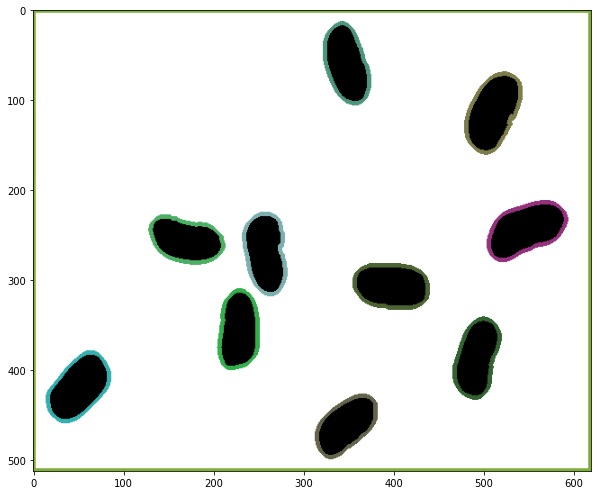

In [6]:
find_and_show_contours ('train_fasola.jpg')

## Zad 1. a) Obliczenie momentów

Do obliczania momentów centralnych obrazu (obiektu) służy wbudowana funkcja opencv *cv2.moments*. Może ona przyjmować jako argument wejściowy cały obraz lub kontur (uzyskany z poprzednio użytej funkcji *cv2.findContours*).

Funkcja ta wylicza momenty do 3 rzędu wiec w wyniku otrzymujemy 24 wartości. W języku python wynik jest w postaci 'dict'.

[Referencja] Dokumentacja: https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.moments#cv2.moments

In [7]:
# obliczanie momentów dla całego obrazu
M_img = cv2.moments(img)
M_img

{'m00': 55662581.0,
 'm01': 14193671893.0,
 'm02': 4937610075633.0,
 'm03': 1938756499049677.0,
 'm10': 14655823528.0,
 'm11': 3681553694900.0,
 'm12': 1271837612229908.0,
 'm20': 5140636970036.0,
 'm21': 1281156243470360.0,
 'm30': 2004671605282684.0,
 'mu02': 1318296738255.8096,
 'mu03': 7373545931929.25,
 'mu11': -55605932644.78955,
 'mu12': 135224012890.625,
 'mu20': 1281793929971.4658,
 'mu21': -397930271832.75,
 'mu30': -23832238766643.0,
 'nu02': 0.0004254871976778654,
 'nu03': 3.189833682776984e-07,
 'nu11': -1.7947106875648356e-05,
 'nu12': 5.849859959113678e-09,
 'nu20': 0.0004137057245439586,
 'nu21': -1.721466708428835e-08,
 'nu30': -1.030994838245088e-06}

In [8]:
# obliczanie momentów dla pojedynczego obiektu
cnt = contours[0]
M = cv2.moments(cnt)
M

{'m00': 13539.0,
 'm01': 4453623.5,
 'm02': 1480150007.6666665,
 'm03': 496853001540.75,
 'm10': 5246845.0,
 'm11': 1725934596.75,
 'm12': 573608916051.0834,
 'm20': 2047394087.8333333,
 'm21': 673483106010.5834,
 'm30': 804331389592.5,
 'mu02': 15140606.695232153,
 'mu03': 59577.995544433594,
 'mu11': -3226.7862656116486,
 'mu12': 161697.4733028412,
 'mu20': 14054664.3881011,
 'mu21': -58362.0312871933,
 'mu30': -150692.65087890625,
 'nu02': 0.08259810839707632,
 'nu03': 2.7933118066139314e-06,
 'nu11': -1.7603418879186556e-05,
 'nu12': 7.581179211368537e-06,
 'nu20': 0.07667385567702992,
 'nu21': -2.7363013737329416e-06,
 'nu30': -7.065218576480423e-06}

## Zad 1. b) Obliczenie pola powierzchni i obwodu

Aby obliczyć pole powierzchni i obwodu również można użyć wbudowanych funkcji biblioteki OpenCV.

In [9]:
area = cv2.contourArea(cnt)
area

13539.0

In [10]:
perimeter = cv2.arcLength(cnt,True) # Drugi argument określa czy kształt ma zamknięty kontur (wtedy podajemy True) czy jest to krzywa
perimeter

434.61731016635895

## Zad 1. c) Obliczanie współczynników kształtu

Do obliczenia wybranych współczynników kształtu również można wspomóc się funkcjami z biblioteki OpenCV.

In [11]:
#aspect ratio
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

0.9629629629629629

In [12]:
#extent
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
extent

0.7714529914529914

In [13]:
#solidity
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
solidity

0.9930321255684319

In [14]:
# equivalentDiameter 
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

131.29505015867647

# Zadanie 2

Opracować algorytm i uruchomić aplikację realizującą klasyfikację obiektu/obrazu na podstawie utworzonego w Zadaniu 1 wektora cech. Klasyfikacja realizowana za pomocą SVM na podstawie zbioru uczącego podanego przez prowadzącego.

## Przykład podziału płaszczyzny przez SVM (Support Vector Machine)

Zakładając że mamy dwie cechy opisujące każdy obiekt, możemy utworzyć płaszczyznę i nanieść na nią punkty odpowiadające każdemu obiektowi. Załóżmy że wiemy że obiekty należą do dwóch klas. Zadaniem klasyfikatora jest wyznaczenie podziału płaszczyzny na dwa rozłączne obszary odpowiadające każdej z klas, czyli na znalezieniu tzw. granicy decyzyjnej między klasami. Prosty przykład poniżej (nie trzeba wnikliwie analizować kodu, tym zajmiemy się w dalszej części).


In [15]:
# Set up training data
labels = np.array([1, -1, -1, -1])
trainingData = np.matrix([[501, 10], [255, 10], [501, 255], [10, 501]], dtype=np.float32)
#labels.shape

In [16]:
# Train the SVM
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
svm.train(trainingData, cv2.ml.ROW_SAMPLE, labels)


True

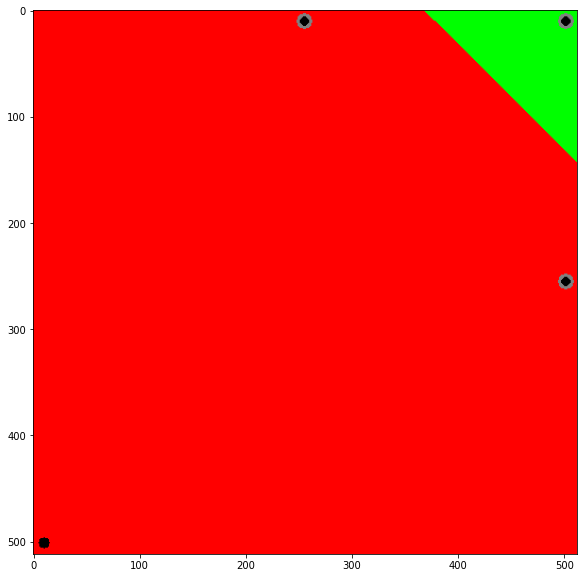

In [17]:
# Image for visual representation
width = 512
height = 512
image = np.zeros((height, width, 3), dtype=np.uint8)
# Show the decision regions given by the SVM
green = (0,255,0)
blue = (255,0,0)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        sampleMat = np.matrix([[j,i]], dtype=np.float32)
        response = svm.predict(sampleMat)[1]
        if response == 1:
            image[i,j] = green
        elif response == -1:
            image[i,j] = blue
# Show the training data
thickness = -1
for dataPoint in trainingData:
  cv2.circle(image, (dataPoint[0,0], dataPoint[0,1]), 5, (  0,   0,   0), thickness)
# Show support vectors
thickness = 2
sv = svm.getUncompressedSupportVectors()
for i in range(sv.shape[0]):
    cv2.circle(image, (sv[i,0], sv[i,1]), 6, (128, 128, 128), thickness)

#cv2_imshow(image)
plt.figure(figsize=(10,10))
plt.imshow(image)

Jak wydać płaszczyna cech została podzielona na dwa zbiory odpowiadające klasom. Linę podziału można by poprowadzić w wielu miejscach. Dlaczego tutaj jest akurat w tym miejscu? 
Otóż cechą SVM jest wyznaczanie granicy decyzyjnej rozdzielającej z maksymalnym marginesem przykłady należące do różnych klas.

![alt text](https://docs.opencv.org/2.4/_images/optimal-hyperplane.png)

[Rysunek z: https://docs.opencv.org/2.4/doc/tutorials/ml/introduction_to_svm/introduction_to_svm.html gdzie można również dowiedzieć się więcej o działaniu SVM]

W tych prostych przykładach widocznych na dwóch rysunkach powyżej mamy doczynienia z dwuwymiarową przestrzenią cech. W praktyce dotyczącej klasyfikacji obrazów/obiektów często wektory cech zawierają znacznie więcej niż dwie cechy. Przestrzeń cech staje się wielowymiarowa a granica decyzyjna może być skomplikowaną hiperpłaszczyzną. 

SVM cechuje się, tym że próbuje oddzielić dane funkcją liniową, a jeśli to nie wychodzi przenosi dane do wyższych wymiarów przy użyciu tzw. funkcji jądrowych (kernel functions) i wtedy jeszcze raz próbuje znaleźć optymalny podział. [tutaj bardzo proste wyjaśnienie działania SVM: https://tomaszkacmajor.pl/index.php/2016/04/17/support-vector-machine/]


SVM wciąż jest często wykorzystywany przy klasyfikacji obrazów/obiektów ze względu na dużą efektywność obliczeniową (złożoność rośnie tylko liniowo wraz z liczbą wymiarów), relatywnie szybki czas uczenia klasyfikatora i małe wymagania liczby przykładów zbioru uczącego (szczególnie w porównaniu z popularnym głębokim uczeniem).

## Trening i testowanie SVM

Klasyfikacja przy użyciu SVM również może być w prosty sposób zrealizowana przy użyciu biblioteki OpenCV. Poniżej przedstawiam przykład klasyfikacji obiektów należących do trzech klas 'ryż', 'soczewica' i 'fasola'. Obiekty będą klasyfikowane na podstawie wektora cech złożonego z cech prezentowanych w Zadaniu 1.

Jak większość klasyfikatorów SVM do wyuczenia potrzebuje etykietowanych danych treningowych czyli etykiety w postaci nazwy klasy odpowiedno dla każdego wektora cech.

Implementacja SVM w OpenCV wymaga aby dane uczące dla klasyfikatora były podane w postaci macierzy (n,m) gdzie n to liczba przykładów (próbek). Wymiar macierzy (zmiennej) zawierającej etykiety powienien być (n,1). W wersji w języku python zmienne te powinny być typu np.int64.



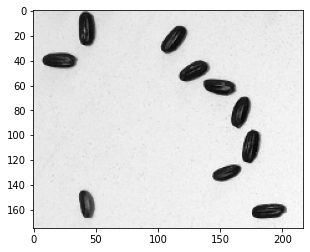

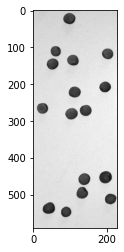

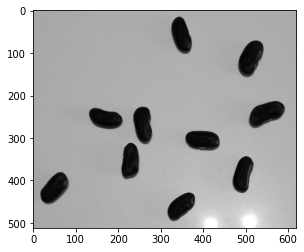

In [18]:
# przygotowane obrazy zawierające dane obiekty zbioru uczącego
img1 = cv2.imread('train_ryz.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('train_soczewica.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('train_fasola.jpg', cv2.IMREAD_GRAYSCALE)
#frame = cv2.hconcat((img1, img2))
#cv2_imshow(img1)
#cv2_imshow(img2)
#cv2_imshow(img3)
plt.figure()
plt.imshow(img1, cmap='gray')
plt.figure()
plt.imshow(img2, cmap='gray')
plt.figure()
plt.imshow(img3, cmap='gray')

In [19]:
# funkcja tworząca wektor cech dla każdego obiektu zanlezionego w obrazie

def get_feat(img):
  ret,thresh = cv2.threshold(img,127,255,0)
  contours,hierarchy = cv2.findContours(thresh, 1, 2)
  #print(len(contours))
  #cv2_imshow(thresh)


  M_all = np.empty((29, 0))

  for cnt in contours:
    M = cv2.moments(cnt)
    M_vec = M.values()
    M_vec = np.array(list(M_vec)).flatten().reshape(-1,1)
    #print(M_vec.shape)

    area = cv2.contourArea(cnt)

    perimeter = cv2.arcLength(cnt,True)

    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h

    rect_area = w*h
    extent = float(area)/rect_area

    equi_diameter = np.sqrt(4*area/np.pi)

    feat_vec = np.array([area, perimeter, aspect_ratio, extent, equi_diameter]).reshape(-1,1)

    M_vec = np.vstack((M_vec, feat_vec))
    #print(M_vec.shape)
    M_all = np.hstack((M_all, M_vec))

  return M_all

In [20]:
# funkcja tworząca wektor zadanych etykiet odpowadający rozmiarem wektorowi cech

def get_target(input_feats, target_class = 1):
  sh = input_feats.shape
  out = np.ones((sh[1],1))
  return out*target_class

In [21]:
# dla każdego obiektu ze zbioru uczącego generujemy wektor cech

img2 = cv2.imread('train_ryz.jpg', cv2.IMREAD_GRAYSCALE)
feat1 = get_feat(img2)
feat1 = np.delete(feat1, feat1.shape[1]-1, axis=1) # usuwamy wektor cech konturu odpowiadającego ramce obrazu

img2 = cv2.imread('train_soczewica.jpg', cv2.IMREAD_GRAYSCALE)
feat2 = get_feat(img2)
feat2 = np.delete(feat2, feat2.shape[1]-1, axis=1)

img2 = cv2.imread('train_fasola.jpg', cv2.IMREAD_GRAYSCALE)
feat3 = get_feat(img2)
feat3 = np.delete(feat3, feat3.shape[1]-1, axis=1)

# konkatencja czyli łączenie wektorów cech w jedną macierz
x_input = np.float32(np.concatenate((feat1,np.concatenate((feat2, feat3),axis =1)),axis =1).transpose())

print('Kształt macierzy cech: ', x_input.shape)
print('Gdzie mamy ', x_input.shape[1],' cech oraz ', x_input.shape[0],' przykładów.')

Kształt macierzy cech:  (36, 29)
Gdzie mamy  29  cech oraz  36  przykładów.


In [22]:
# przygotowanie zbiorczego wektora etykiet
t1 = get_target(feat1, 1)
t2 = get_target(feat2, 2)
t3 = get_target(feat3, 3)
t_input = np.int64(np.concatenate((t1,np.concatenate((t2, t3)))))

print('Kształt wektora etykiet: ', t_input.shape)

Kształt wektora etykiet:  (36, 1)


In [23]:
# Train the SVM
mysvm = cv2.ml.SVM_create() # utowrzenie SVM
mysvm.setType(cv2.ml.SVM_C_SVC) # typ SVM ze stałą C odpowiadającą za dopasowanie hiperpłaszczyzny podziału
mysvm.setKernel(cv2.ml.SVM_LINEAR) # typ funkcji jądrowej
mysvm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 10000, 1e-6)) # warunek zatrzymania uczenia klasyfikatora, tutaj liczba wykonanych iteracji
mysvm.train(x_input, cv2.ml.ROW_SAMPLE, t_input) # właściwy trening/uczenie klasyfikatora


True

Więcej o parametrach SVM można dowiedzieć się tutaj: https://docs.opencv.org/2.4/modules/ml/doc/support_vector_machines.html#CvSVMParams

In [24]:
# predykcja (określenie klasy) klasyfikatora dla zbioru uczącego w celu ewaluacji działania klasyfikatora
y_pred = mysvm.predict(x_input)[1]
svm_acc = accuracy_score(t_input, y_pred) #y_true = t_input
print('SVM trained with '+str(svm_acc)+' accuracy.')

SVM trained with 0.9444444444444444 accuracy.


In [25]:
# dokładniejszy raport dokładności klasyfikacji
print(classification_report(t_input, y_pred, target_names=['ryz','soczewica','fasola'])) 
# kolumna support okresla ile próbek zawiera klasa

              precision    recall  f1-score   support

         ryz       0.83      1.00      0.91        10
   soczewica       1.00      0.88      0.93        16
      fasola       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36



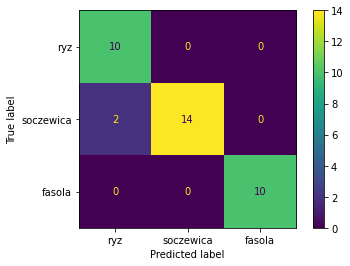

In [26]:
# macierz pomyłek (confusion matrix) - pozwala w przystępny sposób zwizualizować klasyfikację na zbiorze uczącym
CMdisp = ConfusionMatrixDisplay(confusion_matrix(t_input, y_pred), display_labels=['ryz','soczewica','fasola'])
CMdisp.plot()

Jak wydać na powyższym przykładzie, klasyfikator ma dość dobrą precyzję klasyfikacji, nie jest jednak nieomylny. Prawdopodobnie wynika to z mało licznego zbioru danych. Aby zwiększyć poprawność klasyfikacji można stosować wiele innych metod takich normalizacja wektora cech lub randomizacja kolejności próbek (to jednak już szczegóły uczenia maszynowego które na potrzeby tego przedmiotu nie są konieczne i nie będą omawiane). 

Zobaczmy jak klsayfikator radzi sobie z nowymi danymi, obrazem testowym.

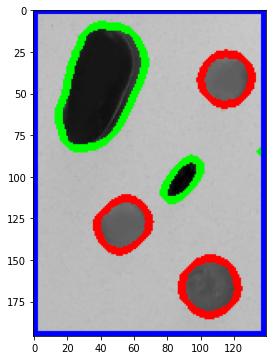

In [27]:
img2 = cv2.imread('test1.jpg', cv2.IMREAD_GRAYSCALE)
feat_test = get_feat(img2)
ret,thresh = cv2.threshold(img2,127,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 

img3 = cv2.cvtColor(img2,cv2.COLOR_GRAY2RGB)
for x in range(len(contours)):
    sampleMat = np.float32(feat_test[:,x].reshape(-1,1).transpose())
    response = mysvm.predict(sampleMat)[1]
    cnt = contours[x]
    if response == 1:
      cv2.drawContours(img3, [cnt], 0, (0,255,0), 3) # zielony = ryz
    elif response == 2:
      cv2.drawContours(img3, [cnt], 0, (255,0,0), 3) # niebieski = soczewica
    elif response == 3:
      cv2.drawContours(img3, [cnt], 0, (0,0,255), 3) # czerwony = fasola
    else:
      cv2.drawContours(img3, [cnt], 0, (255,255,255), 3)


plt.figure(figsize=(6,6))
plt.imshow(img3)

Jak widać obiekty klasy 'soczewica' zostały poprawnie sklasyfikowane, natomiast ziarno fasoli zostało sklasyfikowane jako klasa 'ryz'.
Warto wspomnieć że obrazy tutaj używane zostały tak zmodyfikowane aby ułatwić segmentację a co za tym idzie pożniejszą klasyfikację. Poprawna segmentacja obiektów ma kluczowe znaczenie przy tworzeniu zbioru uczącego, szczególnie gdy mamy tak mało próbek jak w tym przypadku (~10 dla każdej z klas). 


## Wpływ przykładów uczących na wytrenowanie klasyfikatora

Dokonując segmenacji obiektów, przed obliczeniem wektora cech, należy odszumić obraz, usunąć dziury z obiektu, rozdzielić obiety sklejone i wyeliminować artefakty.

Poniżej przykłady wpływu zaburzeń na wyuczenie klasyfikatora. Dla łatwiejszego testowania wpływu jakości obrazów stanowiących zbiór uczący funkcja poniżej, przeprowadza uczenie klasyfikatora i prezentuje poziom wyuczenia w postaci raportu i 'confusion matrix'.

In [28]:
import svm_utils

              precision    recall  f1-score   support

         ryz       0.38      1.00      0.56        10
   soczewica       0.69      0.69      0.69        16
      fasola       0.62      0.28      0.38        29

    accuracy                           0.53        55
   macro avg       0.56      0.65      0.54        55
weighted avg       0.59      0.53      0.50        55



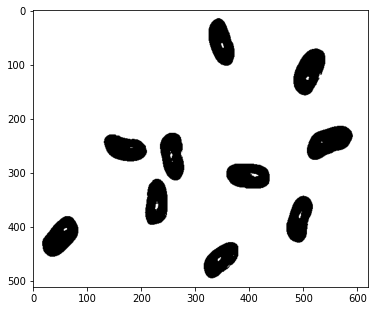

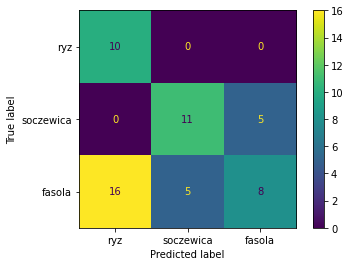

In [29]:
# wpływ braku wypełnienia dziur w obiektach na poprawność klasyfikacji
img4 = cv2.imread('fasola2.jpg', cv2.IMREAD_GRAYSCALE)
ret,thresh = cv2.threshold(img4,127,255,0)
#cv2_imshow(thresh)
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
svm_3class = svm_utils.train_svm_3class ('train_ryz.jpg','train_soczewica.jpg','fasola2.jpg', cmplot=1, print_report=1, my_labels=['ryz','soczewica','fasola']) 

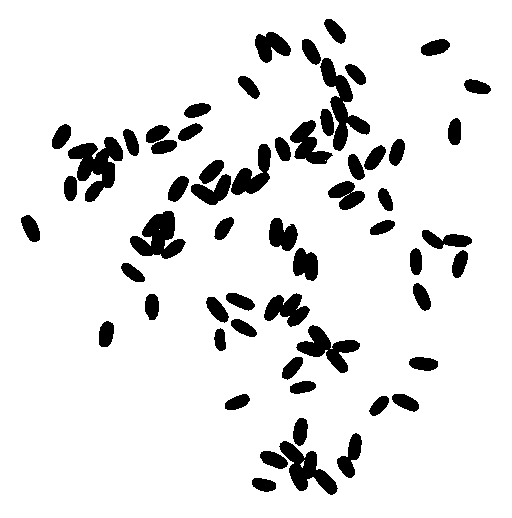

              precision    recall  f1-score   support

         ryz       0.72      0.42      0.53        62
   soczewica       0.22      0.62      0.33        16
      fasola       0.86      0.60      0.71        10

    accuracy                           0.48        88
   macro avg       0.60      0.55      0.52        88
weighted avg       0.65      0.48      0.51        88



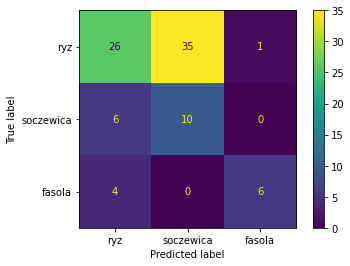

In [30]:
# wpływ sklejonych obiektów na poprawność klasyfikacji
img4 = cv2.imread('ryz1.jpg', cv2.IMREAD_GRAYSCALE)
ret,thresh = cv2.threshold(img4,127,255,0)
cv2_imshow(thresh)
svm_3class = svm_utils.train_svm_3class ('ryz1.jpg','train_soczewica.jpg','train_fasola.jpg', cmplot=1, print_report=1, my_labels=['ryz','soczewica','fasola']) 

## Wpływ preprocessingu na predykcję

Nawet jeśli mamy poprawnie wyuczony klasyfikator, obraz który testujemy również trzeba przygotować (preprocessing). Poniżej wpływ zaszumienia i sklejonych obiektów na wynik klasyfikacji.

              precision    recall  f1-score   support

         ryz       0.83      1.00      0.91        10
   soczewica       1.00      0.88      0.93        16
      fasola       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36



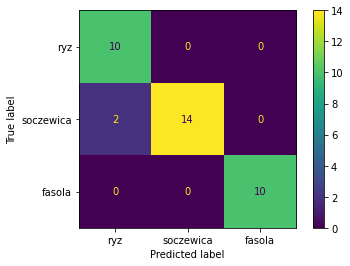

In [31]:
# wracamy do poprawnego wytrenowania
svm_3class = svm_utils.train_svm_3class ('train_ryz.jpg','train_soczewica.jpg','train_fasola.jpg', cmplot=1, print_report=1, my_labels=['ryz','soczewica','fasola']) 

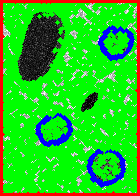

In [32]:
# wpływ zaszumienia na wynik klasyfikacji

svm_utils.show_svm3_preds(svm_3class,'test1_noise.jpg') # funckcja prezentująca wynik dla podanego obrazu przy użyciu podanego wyuczonego klasyfikatora
# zielony = ryz
# niebieski = soczewica
# czerwony = fasola

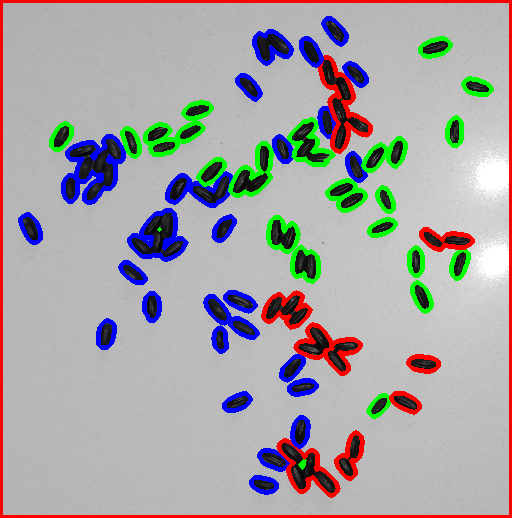

In [33]:
# wpływ sklejonych obiektów na wynik klasyfikacji

svm_utils.show_svm3_preds(svm_3class,'ryz1.jpg') # funckcja prezentująca wynik dla podanego obrazu przy użyciu podanego wyuczonego klasyfikatora
# zielony = ryz
# niebieski = soczewica
# czerwony = fasola

Podsumowując, SVM jest klasyfikatorem, który potrzebuje etykietowanych danych uczących. Na ich podstawie jest w stanie dokonać klasyfikacji z dość dobrą precyzją, niezbędne jest jednak zadbanie o jakość obrazu i poprawną segmentację.